In [ ]:
!pip install pytorch-metric-learning

In [2]:
%cd "/content/drive/Othercomputers/MyEnvy/online-music-structure-segmentation"
!ls

/content/drive/Othercomputers/MyEnvy/online-music-structure-segmentation
doc	 my_mss.ipynb  rl		 sup_train.py
LICENSE  README.md     supervised_model  utils


In [16]:
import os

# train

In [ ]:
!python "/content/drive/Othercomputers/MyEnvy/online-music-structure-segmentation/sup_train.py"

2022-02-21 01:32:48-INFO-sup_train.py[35]-Start training!
2022-02-21 01:32:48-INFO-sup_train.py[36]-Namespace(batch_size=128, lr=0.001, model='unsup_embedding', n_epochs=200, pretrained=None)
  0% 0/912 [00:00<?, ?it/s]/content/drive/Othercomputers/MyEnvy/online-music-structure-segmentation/supervised_model/mss_data.py:59: FutureWarning: The default value of regex will change from True to False in a future version.
  labels = labels.str.replace('\d+', '')
Epoch:[0/200], loss=1.79210: 100% 912/912 [01:18<00:00, 11.61it/s]
2022-02-21 01:34:07-INFO-sup_train.py[113]-Epoch:[0/200]	 loss=1.80657	 score=0.000
Epoch:[1/200], loss=1.63932: 100% 912/912 [01:17<00:00, 11.73it/s]
2022-02-21 01:35:25-INFO-sup_train.py[113]-Epoch:[1/200]	 loss=1.79933	 score=0.000
Epoch:[2/200], loss=1.71367: 100% 912/912 [01:17<00:00, 11.75it/s]
2022-02-21 01:36:42-INFO-sup_train.py[113]-Epoch:[2/200]	 loss=1.79559	 score=0.000
Epoch:[3/200], loss=1.74482: 100% 912/912 [01:17<00:00, 11.73it/s]
2022-02-21 01:38:00-

In [20]:
# remove dull experiments
import os, shutil
rp = '/content/drive/Othercomputers/MyEnvy/online-music-structure-segmentation/supervised_model/sup_experiments'
dirs = os.listdir(rp)
for d in dirs:
  exp_p = os.path.join(rp, d)
  if not os.path.isdir(exp_p):
    continue
  f_list = os.listdir(exp_p)
  if len(f_list) < 3:
    shutil.rmtree(exp_p)

# dataset

In [3]:
from supervised_model.mss_data import HarmonixDataset, SongDataset
from supervised_model import config as cfg
import torch
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np

## visualize training data

/content/drive/MyDrive/thesis/dataset/harmonixset-master/dataset/melspecs/0309_whatsmyname-mel.npy
(80, 2000)


/content/drive/Othercomputers/MyEnvy/online-music-structure-segmentation/supervised_model/mss_data.py:60: FutureWarning: The default value of regex will change from True to False in a future version.
  labels = labels.str.replace('\d+', '')


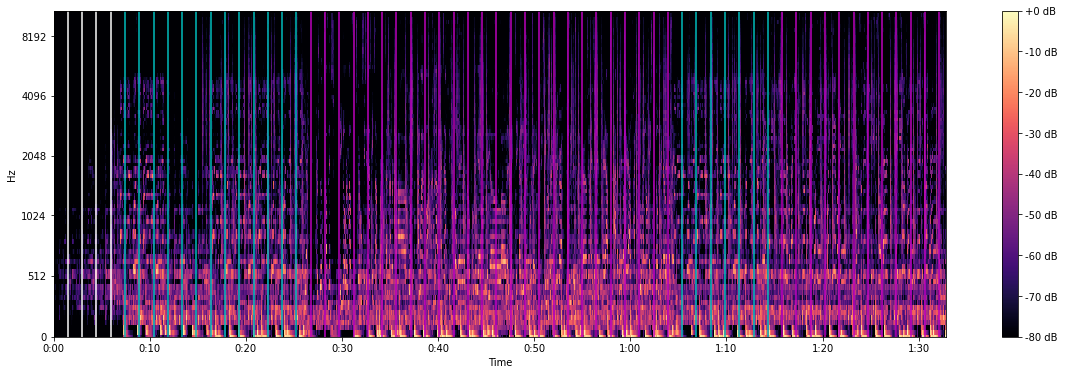

In [13]:
sr = 22050
stft_hop = 1024
chunk_len = cfg.CHUNK_LEN
hop_size = cfg.HOP_SIZE
bin_len = cfg.BIN_TIME_LEN

cut = 2000

dataset = HarmonixDataset()
dataloader = torch.utils.data.DataLoader(dataset)
iterator = iter(dataset)
song, labels = next(iterator)
song = song[:, :cut]
labels = labels[:cut]
print(song.shape)
#song, labels = song.squeeze(0), labels.squeeze(0)
times = (bin_len * chunk_len + 2 * np.arange(len(labels)) * hop_size * bin_len) / 2

plt.rcParams['figure.figsize'] = (20, 6)
spec = librosa.amplitude_to_db(song, ref=np.max)
img = librosa.display.specshow(spec, x_axis='time', y_axis='mel', sr=sr, hop_length=stft_hop)

color_dict = ('w', 'c', 'm', 'y', 'b', 'g', 'r')

for seg in list(set(labels)):
  plt.vlines(times[labels == seg], 0, sr/2, color=color_dict[seg])

plt.colorbar(format="%+2.f dB")
plt.show()